In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import jalali_pandas
from persiantools.jdatetime import JalaliDate, JalaliDateTime
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv(r'covid_0.csv')
df.head()

,کد ملی / کد اتباع خارجی,تاریخ پذیرش,سن,جنسیت,نام بخش بستری,سابقه تماس با بیمار مبتلا به کرونا ویروس,جواب تست کرونا ویروس,علا ئم اولیه - تب,علا ئم اولیه - سرفه,علا ئم اولیه - درد عضلانی,...,سینا-نام واکسن مرحله 2,سینا-نام واکسن مرحله 3,سینا-نام واکسن مرحله 4,سینا-تاریخ تزریق دوز اول,سینا-تاریخ تزریق دوز دوم,سینا-تاریخ تزریق دوز سوم,سینا-تاریخ تزریق دوز چهارم,سابقه ابتلا به موکورمایکوزیس,دوز دريافت واكسن,فوت شده
0,10026894.0,1400/07/03,32,مرد,بستری موقت,بلی,NaN,ندارد,دارد,ندارد,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10061207.0,1400/05/29,52,زن,سایر (بخش های عادی),بلی,مثبت,ندارد,دارد,ندارد,...,Covid19-sinopharm -کرونا سینوفارم,NaN,Covid19-sinopharm -کرونا سینوفارم,1400/05/12,1400/07/29,NaN,1401/05/18,NaN,بیمار دوز اول دریافت کرده,0
2,10087869.0,1401/11/23,33,مرد,ویژه,بلی,منفی,ندارد,ندارد,دارد,...,Covid19-sinopharm -کرونا سینوفارم,Covid19-sinopharm -کرونا سینوفارم,SpikoGen-اسپایکوژن,1400/05/14,1400/07/10,1400/10/19,1401/04/28,خیر,دوز سوم نیز دریافت شده است,0
3,10240691.0,1400/05/21,32,مرد,بستری موقت,خیر,مثبت,ندارد,ندارد,دارد,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10403930.0,1399/07/04,31,زن,سایر (بخش های عادی),خیر,منفی,ندارد,دارد,ندارد,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


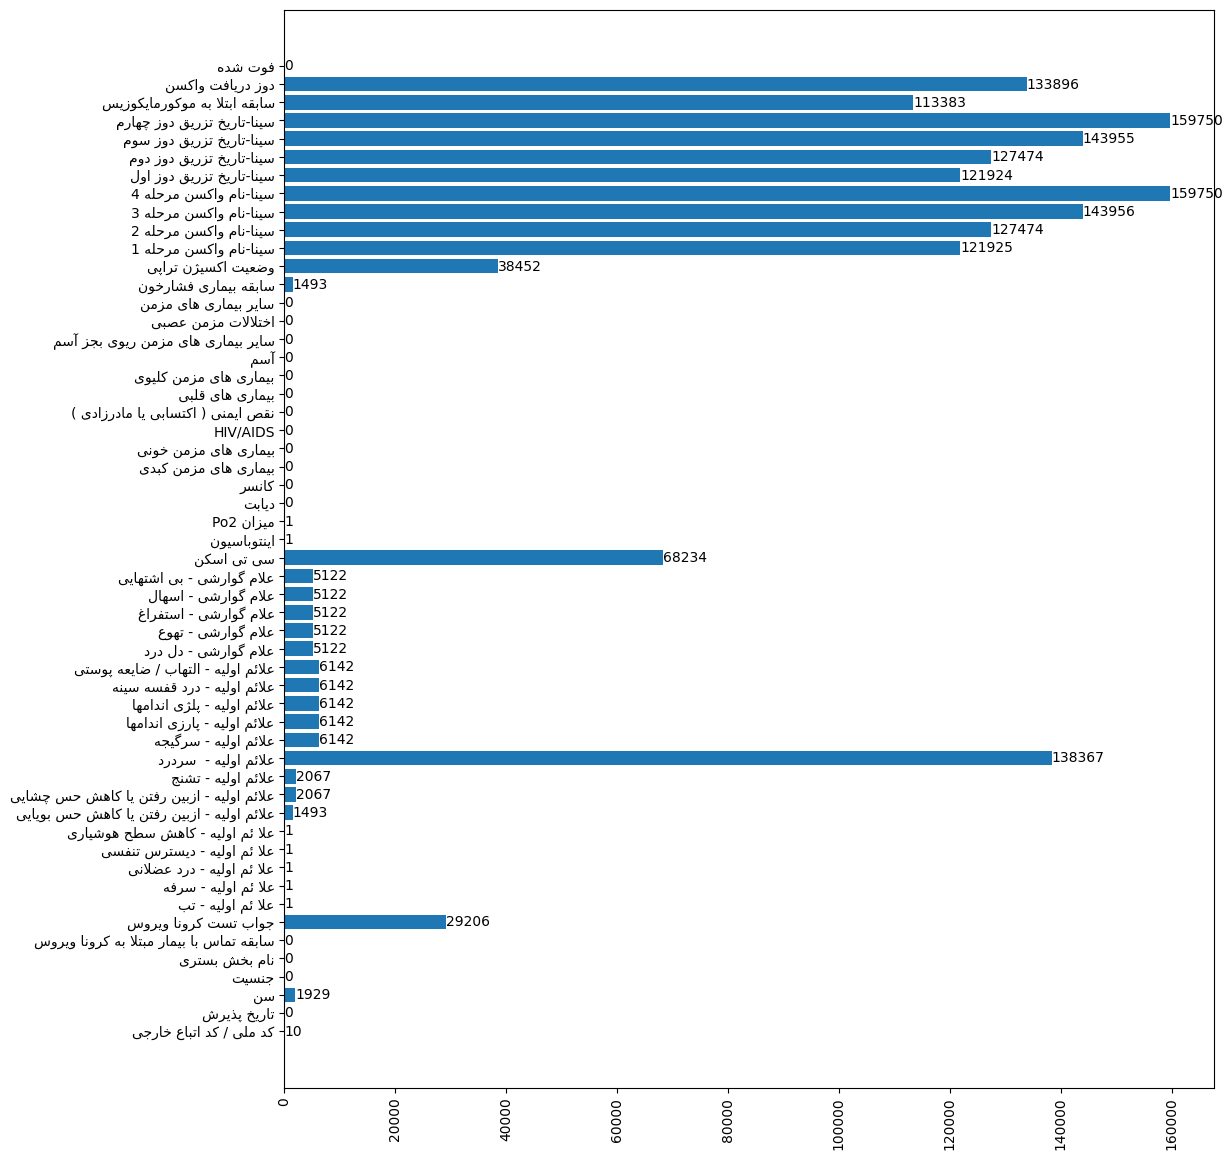

In [10]:
lab=df.isna().sum().index
persian_lab= [get_display(reshape(lab)) for lab in lab]
fig,ax=plt.subplots(figsize=(12,14))
bars = ax.barh(persian_lab, df.isna().sum())
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [7]:
df.shape

(89954, 54)

In [6]:
df=df[df['تاریخ پذیرش']>='1400/03/31']

In [13]:
df.loc[(df['جواب تست کرونا ویروس']=='مثبت'),'covid']=1
df.loc[(df['جواب تست کرونا ویروس']=='منفی'),'covid']=0
df.loc[(df['جواب تست کرونا ویروس']=='در حال پیگیری')& (df['سی تی اسکن']=='علائم دارد'),'covid']=1
df.loc[(df['جواب تست کرونا ویروس'].isnull()==True)& (df['سی تی اسکن']=='علائم دارد'),'covid']=1
df['covid'].fillna(0,inplace=True)

[Text(0, 0, 'negative'), Text(1, 0, 'positive')]

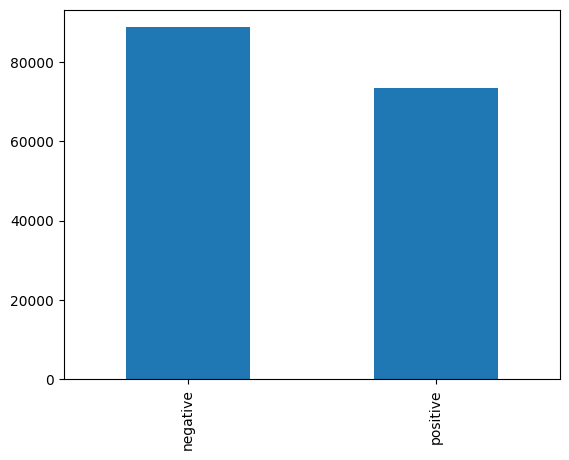

In [17]:
ax = df['covid'].value_counts().plot(kind='bar')
ax.set_xticklabels(['negative','positive'])


In [19]:
df.loc[(df['جنسیت']=='مرد'),'sex']='male'
df.loc[(df['جنسیت']=='زن'),'sex']='female'

In [31]:
df.iloc[:, :] = df.iloc[:, :].replace({ 'خیر' : 0, 'بلی': 1 })
df.iloc[:, :] = df.iloc[:, :].replace({ 'ندارد' : 0, 'دارد': 1 })
df.iloc[:, :] = df.iloc[:, :].replace({ 'انجام نمی شود' : 0, 'انجام می شود': 1 })

In [43]:
df['Early_symptoms'] = df.iloc[:, 7:21].sum(axis=1)
df['Digestion_symptoms'] = df.iloc[:, 21:26].sum(axis=1)
df['temp'] = df.iloc[:, 30:41].sum(axis=1)
df.loc[df['temp']==0,'Underlying_disease']=0
df.loc[df['temp']>0,'Underlying_disease']=1
df.loc[df['کانسر']==1,'Underlying_disease']=2
df.loc[df['دیابت']==1,'Underlying_disease']=3
df.loc[(df['دیابت']==1)&(df['کانسر']==1),'Underlying_disease']=4

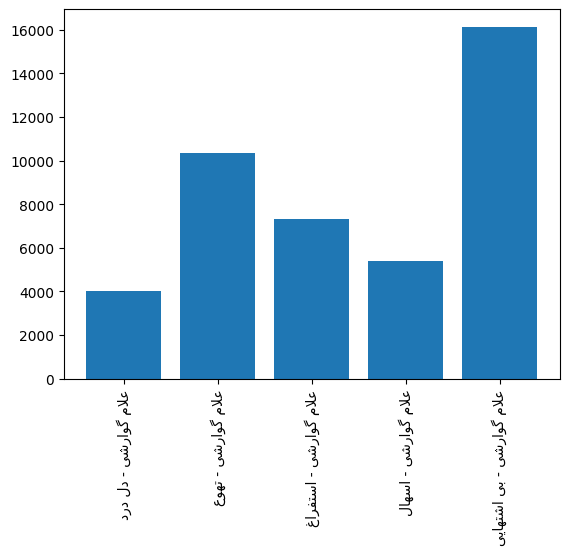

In [44]:
lab=df.columns[21:26]
persian_lab= [get_display(reshape(lab)) for lab in lab]
column_sum = df.iloc[:, 21:26].sum(axis=0)
plt.bar(persian_lab, column_sum)
plt.xticks(rotation=90)
plt.show()

[Text(0, 0, 'ﯼﺍ ﻪﻨﯿﻣﺯ ﻢﺋﻼﻋ ﻥﻭﺪﺑ'),
 Text(1, 0, 'ﺩﺭﺍﺩ ﺍﺭ ﯼﺍ ﻪﻨﯿﻣﺯ ﯼﺎﻫ ﯼﺭﺎﻤﯿﺑ ﺮﯾﺎﺳ'),
 Text(2, 0, 'ﺖﺑﺎﯾﺩ'),
 Text(3, 0, 'ﻥﺎﻃﺮﺳ'),
 Text(4, 0, 'ﻥﺎﻃﺮﺳ ﻭ ﺖﺑﺎﯾﺩ')]

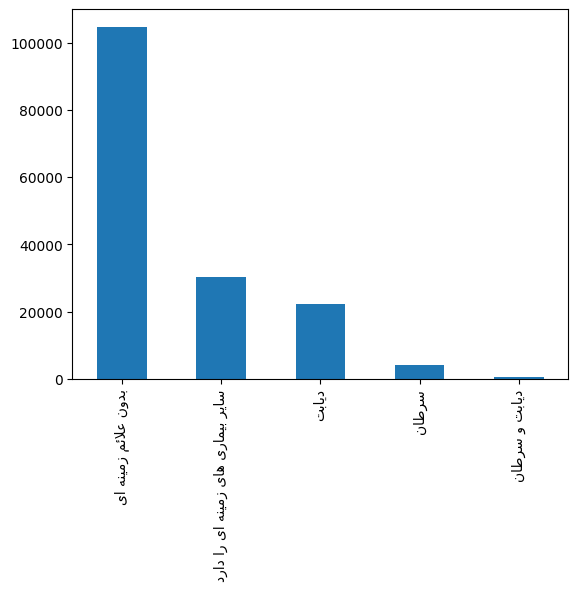

In [47]:
ax=df['Underlying_disease'].value_counts().plot(kind='bar')
ax.set_xticklabels([get_display(reshape('بدون علائم زمینه ای')),get_display(reshape('سایر بیماری های زمینه ای را دارد')),get_display(reshape('دیابت')),get_display(reshape('سرطان')),get_display(reshape('دیابت و سرطان'))])

In [10]:
df.loc[df['سن']=='زیر یک سال','سن']=0
df.loc[df['سن']=='BALAYE100','سن']=100

In [11]:
df['کد ملی / کد اتباع خارجی'].dropna(inplace=True)
df.drop(df[df['کد ملی / کد اتباع خارجی'] == 0].index, inplace=True)

In [12]:
df['سن'] = df.groupby('کد ملی / کد اتباع خارجی')['سن'].fillna(method='ffill')
df['سن'].fillna(62,inplace=True)
df['سن']=df['سن'].astype('int')
df=df[df['سن']<=100]

In [13]:
df.fillna(0,inplace=True)

In [14]:
df['میزان Po2']=df['میزان Po2'].replace({'بیشتر از 93 درصد':1,'کمتر از 93 درصد':0})

In [15]:
df['اینتوباسیون']=df['اینتوباسیون'].replace({'انجام شده':1,'انجام نشده':0})

In [16]:
le = LabelEncoder()
df['نام بخش بستری'] = le.fit_transform(df['نام بخش بستری'])
df['sex'] = le.fit_transform(df['sex'])

In [17]:
df.to_csv('first_preP.csv',index=False,encoding='utf-8-sig')